# Alpha Sweep Experiment: Linear vs Ratio Cost

This notebook runs the RRT* planner for various values of `alpha` to compare two cost functions:
1. **Linear Cost**: $Cost = Distance - \alpha \times Plastic$
2. **Ratio Cost**: $Cost = \frac{Distance}{1 + \alpha \times Plastic}$

We define `alpha` as the incentive to collect plastic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import planning_lib
from planning_lib import ContinuousPlannerUtil
from run_gpgp_experiment import rrt_star_tunable

## Run Experiments

In [2]:
c = ContinuousPlannerUtil('ocean_real.png', 'summer_2002_day0_density.png', scale=0.8)

# --- Linear Cost Experiment ---
linear_alphas = []
linear_lengths = []
linear_plastics = []

print("--- Starting LINEAR Cost Sweep (D - alpha*P) ---")
for alpha in range(1, 16):
    print(f"\n[Linear] Alpha = {alpha}.0")
    np.random.seed(42)
    # Linear cost mode
    # Now returns L, P, ratio, path
    L, P, ratio, _ = rrt_star_tunable(c, alpha=float(alpha), cost_mode="linear", loops=1000, output_prefix="rrt_linear")
    
    linear_alphas.append(alpha)
    linear_lengths.append(L)
    linear_plastics.append(P)

# --- Ratio Cost Experiment ---
ratio_alphas = []
ratio_lengths = []
ratio_plastics = []

print("\n--- Starting RATIO Cost Sweep (D / (1 + alpha*P)) ---")
for alpha in range(1, 16):
    print(f"\n[Ratio] Alpha = {alpha}.0")
    np.random.seed(42)
    # Ratio cost mode
    L, P, ratio, _ = rrt_star_tunable(c, alpha=float(alpha), cost_mode="ratio", loops=1000, output_prefix="rrt_ratio")
    
    ratio_alphas.append(alpha)
    ratio_lengths.append(L)
    ratio_plastics.append(P)

--- Starting LINEAR Cost Sweep (D - alpha*P) ---

[Linear] Alpha = 1.0
Running RRT* with alpha=1.0, mode=linear...


[Alpha 1.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.13, Total Plastic: 0.08, Ratio (L/P): 14.67


rrt_linear_alpha_1.0_mode_linear.gif has been created.

[Linear] Alpha = 2.0
Running RRT* with alpha=2.0, mode=linear...


[Alpha 2.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.19, Total Plastic: 0.11, Ratio (L/P): 10.40


rrt_linear_alpha_2.0_mode_linear.gif has been created.

[Linear] Alpha = 3.0
Running RRT* with alpha=3.0, mode=linear...


[Alpha 3.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.12, Ratio (L/P): 9.78


rrt_linear_alpha_3.0_mode_linear.gif has been created.

[Linear] Alpha = 4.0
Running RRT* with alpha=4.0, mode=linear...


[Alpha 4.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_linear_alpha_4.0_mode_linear.gif has been created.

[Linear] Alpha = 5.0
Running RRT* with alpha=5.0, mode=linear...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_linear_alpha_5.0_mode_linear.gif has been created.

[Linear] Alpha = 6.0
Running RRT* with alpha=6.0, mode=linear...


[Alpha 6.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 2.03, Total Plastic: 0.27, Ratio (L/P): 7.51


rrt_linear_alpha_6.0_mode_linear.gif has been created.

[Linear] Alpha = 7.0
Running RRT* with alpha=7.0, mode=linear...


[Alpha 7.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.05, Total Plastic: 0.40, Ratio (L/P): 7.62


rrt_linear_alpha_7.0_mode_linear.gif has been created.

[Linear] Alpha = 8.0
Running RRT* with alpha=8.0, mode=linear...


[Alpha 8.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.77, Total Plastic: 0.51, Ratio (L/P): 7.46


rrt_linear_alpha_8.0_mode_linear.gif has been created.

[Linear] Alpha = 9.0
Running RRT* with alpha=9.0, mode=linear...


[Alpha 9.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 3.96, Total Plastic: 0.50, Ratio (L/P): 7.95


rrt_linear_alpha_9.0_mode_linear.gif has been created.

[Linear] Alpha = 10.0
Running RRT* with alpha=10.0, mode=linear...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.27, Total Plastic: 0.51, Ratio (L/P): 8.31


rrt_linear_alpha_10.0_mode_linear.gif has been created.

[Linear] Alpha = 11.0
Running RRT* with alpha=11.0, mode=linear...


[Alpha 11.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.74, Total Plastic: 0.54, Ratio (L/P): 8.72


rrt_linear_alpha_11.0_mode_linear.gif has been created.

[Linear] Alpha = 12.0
Running RRT* with alpha=12.0, mode=linear...


[Alpha 12.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.98, Total Plastic: 0.57, Ratio (L/P): 8.76


rrt_linear_alpha_12.0_mode_linear.gif has been created.

[Linear] Alpha = 13.0
Running RRT* with alpha=13.0, mode=linear...


[Alpha 13.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.50, Total Plastic: 0.51, Ratio (L/P): 8.89


rrt_linear_alpha_13.0_mode_linear.gif has been created.

[Linear] Alpha = 14.0
Running RRT* with alpha=14.0, mode=linear...


[Alpha 14.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 5.17, Total Plastic: 0.54, Ratio (L/P): 9.50


rrt_linear_alpha_14.0_mode_linear.gif has been created.

[Linear] Alpha = 15.0
Running RRT* with alpha=15.0, mode=linear...


[Alpha 15.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 5.04, Total Plastic: 0.53, Ratio (L/P): 9.57


rrt_linear_alpha_15.0_mode_linear.gif has been created.

--- Starting RATIO Cost Sweep (D / (1 + alpha*P)) ---

[Ratio] Alpha = 1.0
Running RRT* with alpha=1.0, mode=ratio...


[Alpha 1.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.13, Total Plastic: 0.08, Ratio (L/P): 14.67


rrt_ratio_alpha_1.0_mode_ratio.gif has been created.

[Ratio] Alpha = 2.0
Running RRT* with alpha=2.0, mode=ratio...


[Alpha 2.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.18, Total Plastic: 0.11, Ratio (L/P): 10.73


rrt_ratio_alpha_2.0_mode_ratio.gif has been created.

[Ratio] Alpha = 3.0
Running RRT* with alpha=3.0, mode=ratio...


[Alpha 3.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.19, Total Plastic: 0.11, Ratio (L/P): 10.43


rrt_ratio_alpha_3.0_mode_ratio.gif has been created.

[Ratio] Alpha = 4.0
Running RRT* with alpha=4.0, mode=ratio...


[Alpha 4.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.20, Total Plastic: 0.12, Ratio (L/P): 10.13


rrt_ratio_alpha_4.0_mode_ratio.gif has been created.

[Ratio] Alpha = 5.0
Running RRT* with alpha=5.0, mode=ratio...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_alpha_5.0_mode_ratio.gif has been created.

[Ratio] Alpha = 6.0
Running RRT* with alpha=6.0, mode=ratio...


[Alpha 6.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_alpha_6.0_mode_ratio.gif has been created.

[Ratio] Alpha = 7.0
Running RRT* with alpha=7.0, mode=ratio...


[Alpha 7.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_alpha_7.0_mode_ratio.gif has been created.

[Ratio] Alpha = 8.0
Running RRT* with alpha=8.0, mode=ratio...


[Alpha 8.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_alpha_8.0_mode_ratio.gif has been created.

[Ratio] Alpha = 9.0
Running RRT* with alpha=9.0, mode=ratio...


[Alpha 9.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


rrt_ratio_alpha_9.0_mode_ratio.gif has been created.

[Ratio] Alpha = 10.0
Running RRT* with alpha=10.0, mode=ratio...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.44, Total Plastic: 0.17, Ratio (L/P): 8.57


rrt_ratio_alpha_10.0_mode_ratio.gif has been created.

[Ratio] Alpha = 11.0
Running RRT* with alpha=11.0, mode=ratio...


[Alpha 11.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.44, Total Plastic: 0.17, Ratio (L/P): 8.57


rrt_ratio_alpha_11.0_mode_ratio.gif has been created.

[Ratio] Alpha = 12.0
Running RRT* with alpha=12.0, mode=ratio...


[Alpha 12.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.57, Total Plastic: 0.19, Ratio (L/P): 8.19


rrt_ratio_alpha_12.0_mode_ratio.gif has been created.

[Ratio] Alpha = 13.0
Running RRT* with alpha=13.0, mode=ratio...


[Alpha 13.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.70, Total Plastic: 0.21, Ratio (L/P): 7.93


rrt_ratio_alpha_13.0_mode_ratio.gif has been created.

[Ratio] Alpha = 14.0
Running RRT* with alpha=14.0, mode=ratio...


[Alpha 14.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 2.03, Total Plastic: 0.27, Ratio (L/P): 7.51


rrt_ratio_alpha_14.0_mode_ratio.gif has been created.

[Ratio] Alpha = 15.0
Running RRT* with alpha=15.0, mode=ratio...


[Alpha 15.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.91, Total Plastic: 0.24, Ratio (L/P): 7.97


rrt_ratio_alpha_15.0_mode_ratio.gif has been created.


## Plot Metrics

We investigate how increasing the `alpha` (plastics incentive) affects the path metrics.

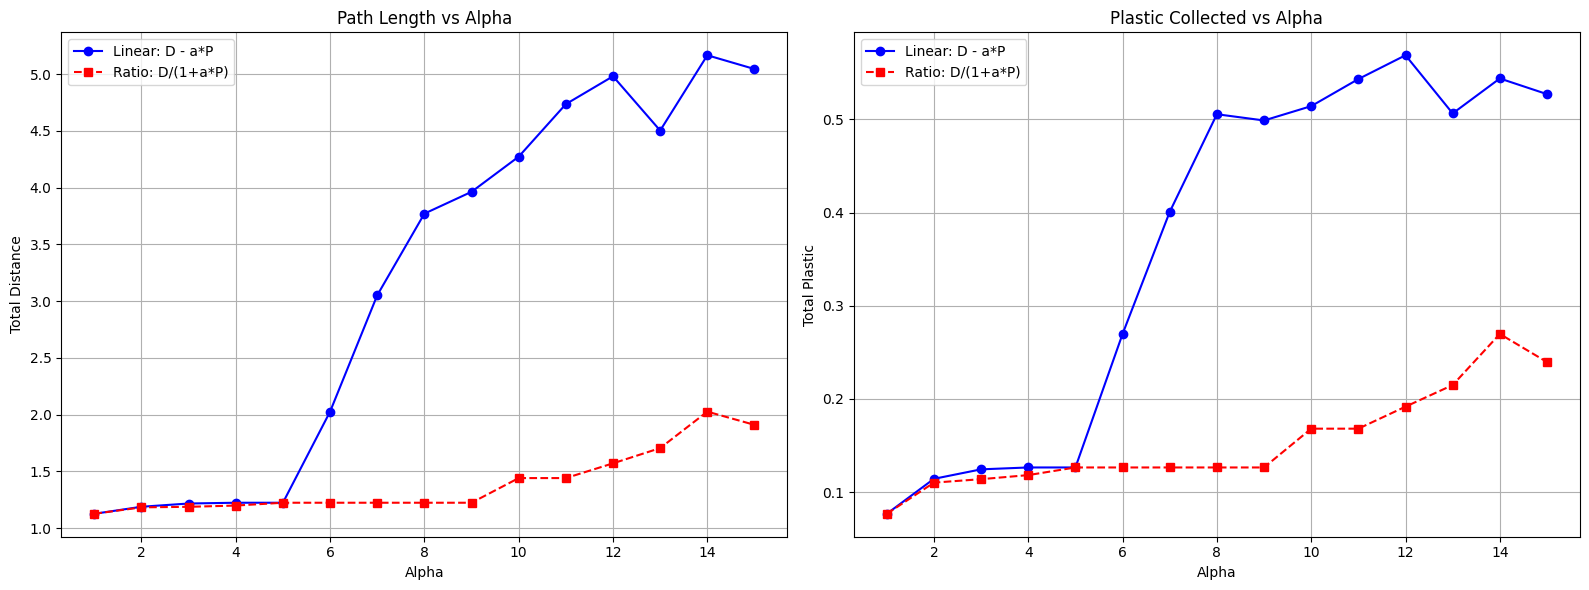

In [3]:
plt.figure(figsize=(16, 6))

# 1. Path Length Comparison
plt.subplot(1, 2, 1)
plt.plot(linear_alphas, linear_lengths, marker='o', color='blue', label='Linear: D - a*P')
plt.plot(ratio_alphas, ratio_lengths, marker='s', color='red', linestyle='--', label='Ratio: D/(1+a*P)')
plt.title('Path Length vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Distance')
plt.legend()
plt.grid(True)

# 2. Plastic Collected Comparison
plt.subplot(1, 2, 2)
plt.plot(linear_alphas, linear_plastics, marker='o', color='blue', label='Linear: D - a*P')
plt.plot(ratio_alphas, ratio_plastics, marker='s', color='red', linestyle='--', label='Ratio: D/(1+a*P)')
plt.title('Plastic Collected vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Total Plastic')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Comparative Path Visualization

We compare the final planned paths for `alpha` = 5, 10, 15 for both cost functions.


--- Generating Comparative Paths (Alpha 5, 10, 15) ---

Running Alpha 5...
Running RRT* with alpha=5.0, mode=linear...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


path_comp_linear_5_alpha_5.0_mode_linear.gif has been created.
Running RRT* with alpha=5.0, mode=ratio...


[Alpha 5.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.22, Total Plastic: 0.13, Ratio (L/P): 9.67


path_comp_ratio_5_alpha_5.0_mode_ratio.gif has been created.

Running Alpha 10...
Running RRT* with alpha=10.0, mode=linear...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 4.27, Total Plastic: 0.51, Ratio (L/P): 8.31


path_comp_linear_10_alpha_10.0_mode_linear.gif has been created.
Running RRT* with alpha=10.0, mode=ratio...


[Alpha 10.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.44, Total Plastic: 0.17, Ratio (L/P): 8.57


path_comp_ratio_10_alpha_10.0_mode_ratio.gif has been created.

Running Alpha 15...
Running RRT* with alpha=15.0, mode=linear...


[Alpha 15.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 5.04, Total Plastic: 0.53, Ratio (L/P): 9.57


path_comp_linear_15_alpha_15.0_mode_linear.gif has been created.
Running RRT* with alpha=15.0, mode=ratio...


[Alpha 15.0] Final Distance to Goal: 0.0000
Goal Reached! Total Distance: 1.91, Total Plastic: 0.24, Ratio (L/P): 7.97


path_comp_ratio_15_alpha_15.0_mode_ratio.gif has been created.


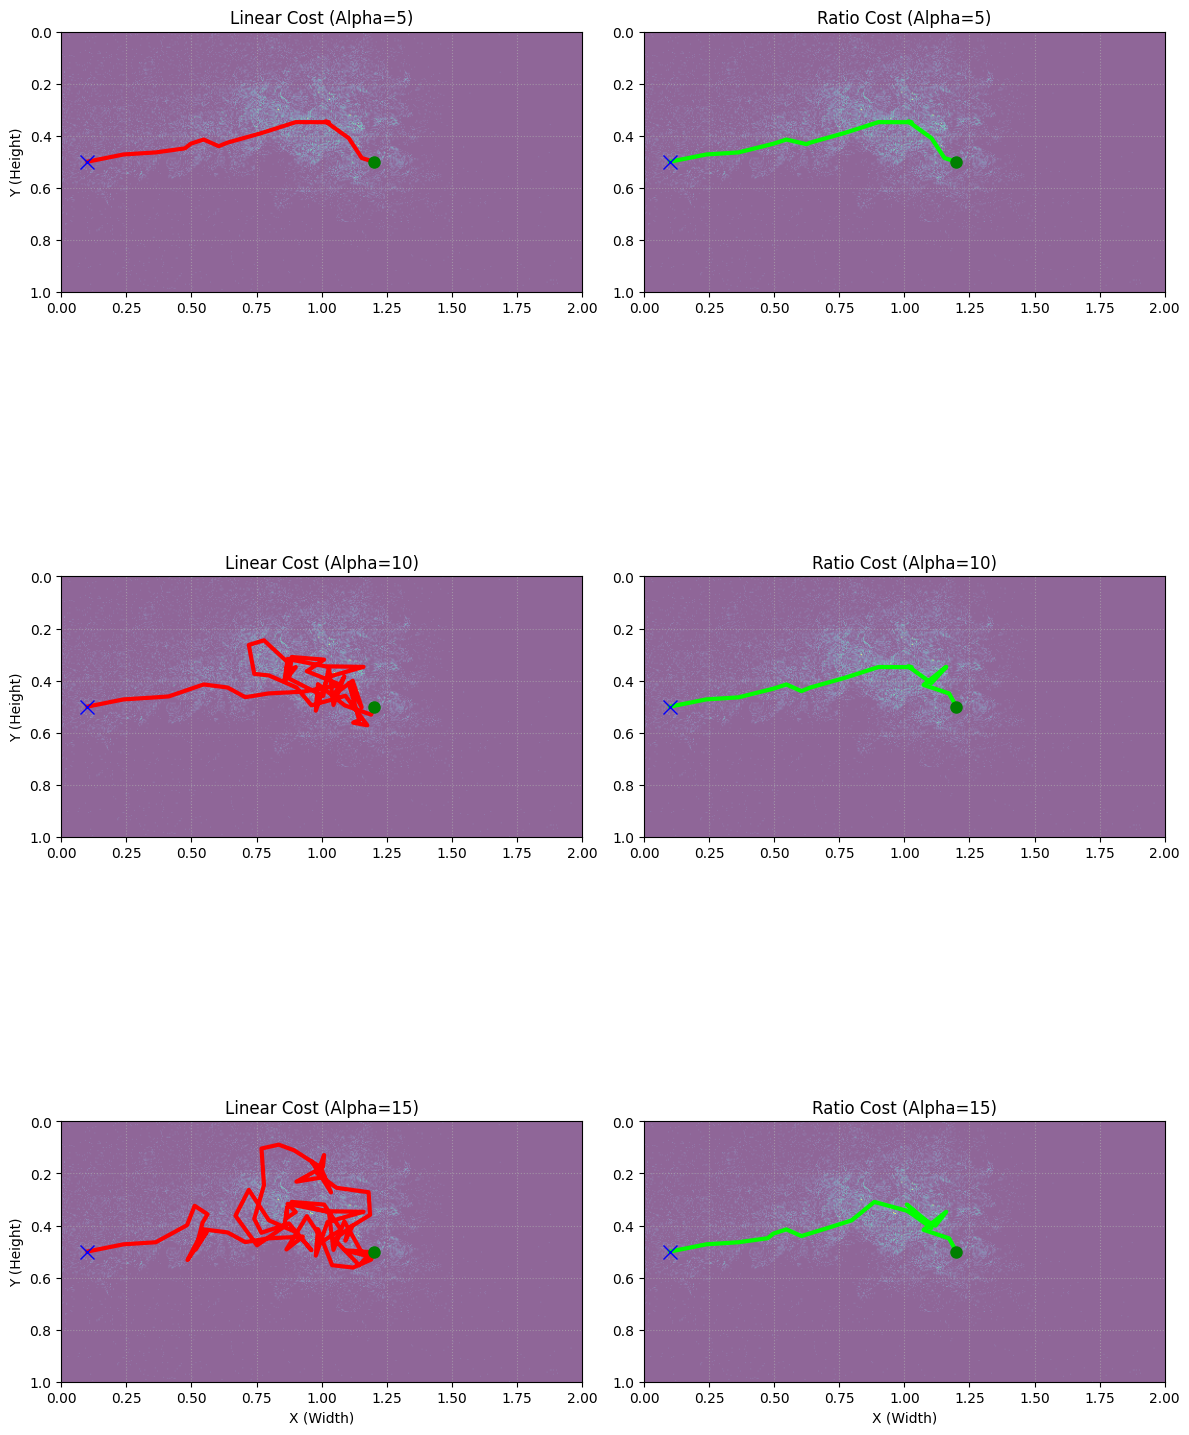

In [4]:
alphas_to_compare = [5, 10, 15]
paths_linear = {}
paths_ratio = {}

print("\n--- Generating Comparative Paths (Alpha 5, 10, 15) ---")
for alpha in alphas_to_compare:
    print(f"\nRunning Alpha {alpha}...")
    
    # Linear
    np.random.seed(42)
    _, _, _, p_linear = rrt_star_tunable(c, alpha=float(alpha), cost_mode="linear", loops=1000, output_prefix=f"path_comp_linear_{alpha}")
    paths_linear[alpha] = p_linear
    
    # Ratio
    np.random.seed(42)
    _, _, _, p_ratio = rrt_star_tunable(c, alpha=float(alpha), cost_mode="ratio", loops=1000, output_prefix=f"path_comp_ratio_{alpha}")
    paths_ratio[alpha] = p_ratio

# Plotting Side-by-Side Comparison
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
# Load background
img = plt.imread('summer_2002_day0_density.png')
# Image extent: x=[0, 2.0], y=[1.0, 0] (origin upper)
extent = [0, 2.0, 1.0, 0.0]

for i, alpha in enumerate(alphas_to_compare):
    # Row i, Col 0: LINEAR
    ax_lin = axes[i, 0]
    ax_lin.imshow(img, origin='upper', extent=extent, alpha=0.6)
    pl = np.array(paths_linear[alpha])
    if len(pl) > 0:
        # Plot X (col 1) on X-axis, Y (col 0) on Y-axis
        ax_lin.plot(pl[:, 1], pl[:, 0], color='red', linewidth=3)
        # Mark Start/End
        ax_lin.plot(pl[0, 1], pl[0, 0], 'go', markersize=8) # Start
        ax_lin.plot(pl[-1, 1], pl[-1, 0], 'bx', markersize=10) # End
    ax_lin.set_title(f"Linear Cost (Alpha={alpha})")
    ax_lin.set_ylabel("Y (Height)")
    if i == 2: ax_lin.set_xlabel("X (Width)")
    ax_lin.grid(True, linestyle=':', alpha=0.6)

    # Row i, Col 1: RATIO
    ax_rat = axes[i, 1]
    ax_rat.imshow(img, origin='upper', extent=extent, alpha=0.6)
    pr = np.array(paths_ratio[alpha])
    if len(pr) > 0:
        ax_rat.plot(pr[:, 1], pr[:, 0], color='lime', linewidth=3)
        # Mark Start/End
        ax_rat.plot(pr[0, 1], pr[0, 0], 'go', markersize=8)
        ax_rat.plot(pr[-1, 1], pr[-1, 0], 'bx', markersize=10)
    ax_rat.set_title(f"Ratio Cost (Alpha={alpha})")
    if i == 2: ax_rat.set_xlabel("X (Width)")
    ax_rat.grid(True, linestyle=':', alpha=0.6)

# Ensure axis limits cover the goal if it goes outside image (Goal x=1.2 is inside 2.0)
# But just in case, set lims based on extent
for ax in axes.flat:
    ax.set_xlim(0, 2.0)
    ax.set_ylim(1.0, 0.0) # Match origin upper

plt.tight_layout()
plt.savefig('path_comparison_grid.png')
plt.show()